<a href="https://colab.research.google.com/github/Ameen2488/Python-Data-Science-for-Geopolitical-Analyses-focused-on-Energy/blob/main/Geopolitical%20Analyses%20focused%20on%20Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python -m pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 27.6 MB/s 
     |████████████████████████████████| 6.3 MB 47.9 MB/s 
     |████████████████████████████████| 46 kB 5.0 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 


In [7]:
!python -m pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 25.7 MB/s 
     |████████████████████████████████| 16.7 MB 366 kB/s 


In [3]:
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
import numpy as np

In [4]:
from geopy.geocoders import Nominatim

# geopy makes it easy for Python developers to locate the coordinates of addresses, cities, etc
# across the globe using various data sources

In [8]:
import geopandas as gpd

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # is a basemap provided with geopandas

In [10]:
world.head(20)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [11]:
world.shape

(177, 6)

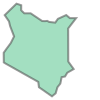

In [14]:
world.loc[5,'geometry']
 # this is a polygon

world.loc[13,'geometry']

In [15]:
world.query("continent == 'Africa'")

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
14,37345935,Africa,Sudan,SDN,176300.0,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
15,12075985,Africa,Chad,TCD,30590.0,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
25,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
26,1958042,Africa,Lesotho,LSO,6019.0,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257..."
48,13805084,Africa,Zimbabwe,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


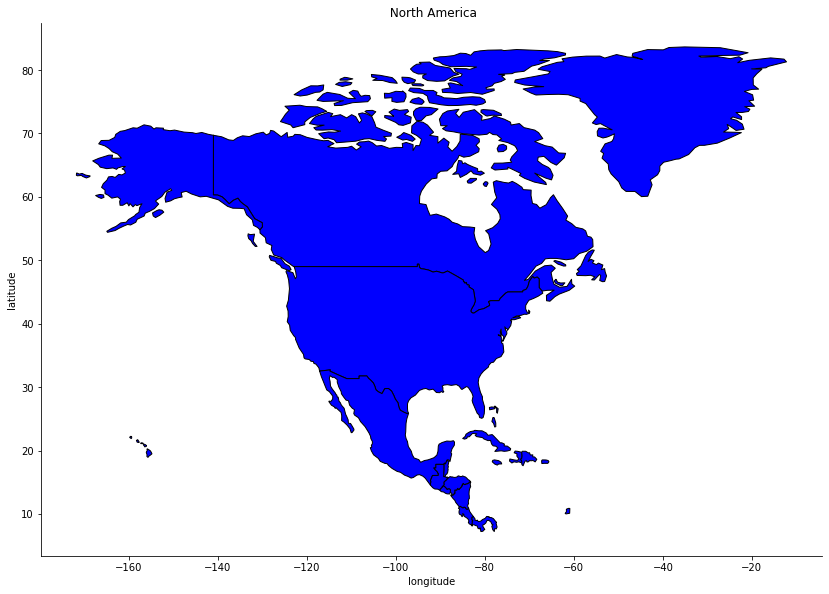

In [23]:
fig,gax = plt.subplots(figsize=(14,10))
world.query("continent =='North America'").plot(ax = gax, edgecolor = 'black', color = 'Blue')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title(' North America')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

Text(0.5, 1.0, 'World Population')

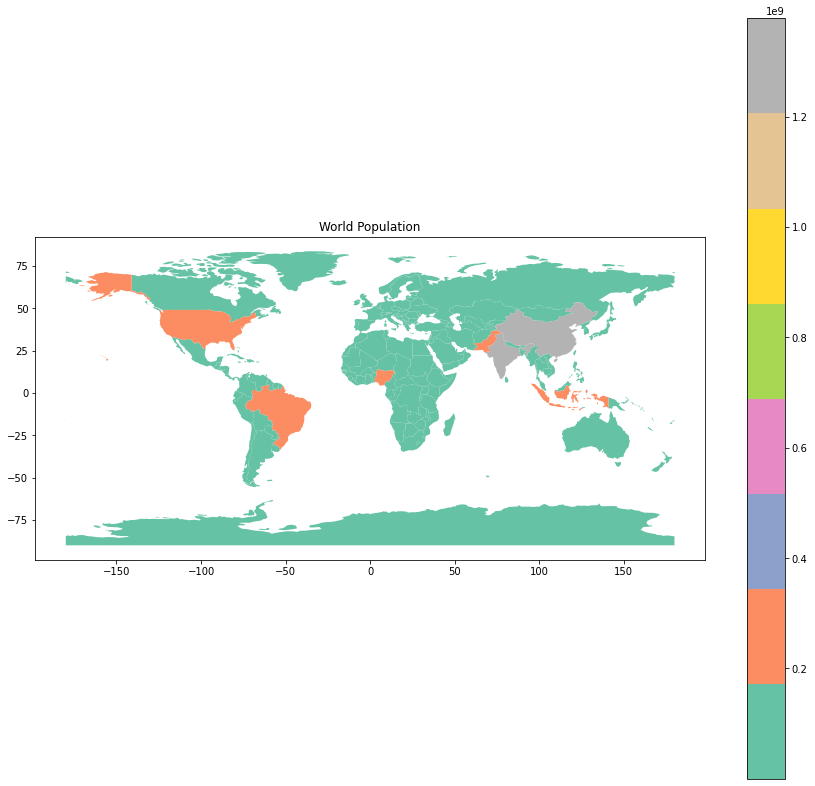

In [24]:
world.plot('pop_est', legend = True, figsize = (15, 14), cmap = 'Set2')   # cmap: 'Set2', 'magma'

plt.title('World Population')